# Community alignment of training questions

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
from ollama_models import ollama_models
models = ollama_models()

In [3]:
from community_alignment import community_alignment

Loaded existing index from forecast_index.faiss
Index contains 4916 vectors at initialization


100%|████████████████████████████████████████| 10/10 [00:00<00:00, 14737.54it/s]


saved community_gemma3:latest.json
Loaded existing index from forecast_index.faiss
Index contains 4916 vectors at initialization


100%|████████████████████████████████████████| 10/10 [00:00<00:00, 10931.21it/s]

saved community_mistral-small3.1:latest.json


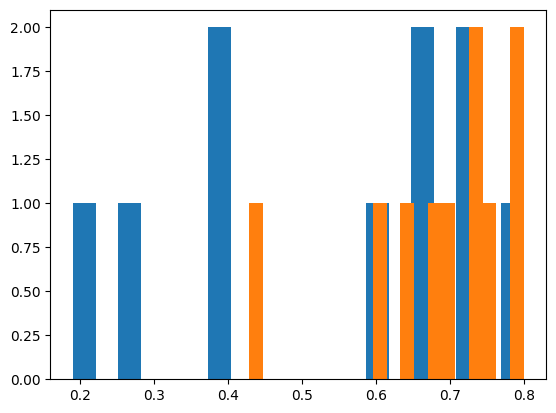

In [4]:
dfs = {}
for model in models:
    df = community_alignment(model)
    dfs[model] = df

In [5]:
for model in models:
    df = dfs[model]
    df1 = df[['model', 'id', 'title', 'error']].sort_values(by='id')
    display(df1)

,model,id,title,error
7,gemma3:latest,1337,Drake's Equation 1st Parameter R∗: What is the...,0.650000
4,gemma3:latest,1454,What will be the total aggregate score given t...,0.604831
3,gemma3:latest,1482,What percentage of Americans will be obese or ...,0.190610
9,gemma3:latest,2622,What will be the highest level of annual GDP g...,0.800000
5,gemma3:latest,3054,How many hours will the average American emplo...,0.657918
8,gemma3:latest,5531,How many seats will be on the Supreme Court of...,0.400000
6,gemma3:latest,6614,What is the highest value 1 bitcoin will ever ...,0.720626
2,gemma3:latest,6633,In how many years will humanity's descendants ...,0.400000
0,gemma3:latest,7811,How many nuclear weapons will be detonated off...,0.734768
1,gemma3:latest,8734,What percentage of new vehicle production will...,0.253973


,model,id,title,error
7,mistral-small3.1:latest,1337,Drake's Equation 1st Parameter R∗: What is the...,0.736315
4,mistral-small3.1:latest,1454,What will be the total aggregate score given t...,0.750000
3,mistral-small3.1:latest,1482,What percentage of Americans will be obese or ...,0.704648
9,mistral-small3.1:latest,2622,What will be the highest level of annual GDP g...,0.800000
5,mistral-small3.1:latest,3054,How many hours will the average American emplo...,0.600000
8,mistral-small3.1:latest,5531,How many seats will be on the Supreme Court of...,0.730980
6,mistral-small3.1:latest,6614,What is the highest value 1 bitcoin will ever ...,0.428714
2,mistral-small3.1:latest,6633,In how many years will humanity's descendants ...,0.650000
0,mistral-small3.1:latest,7811,How many nuclear weapons will be detonated off...,0.686938
1,mistral-small3.1:latest,8734,What percentage of new vehicle production will...,0.800000


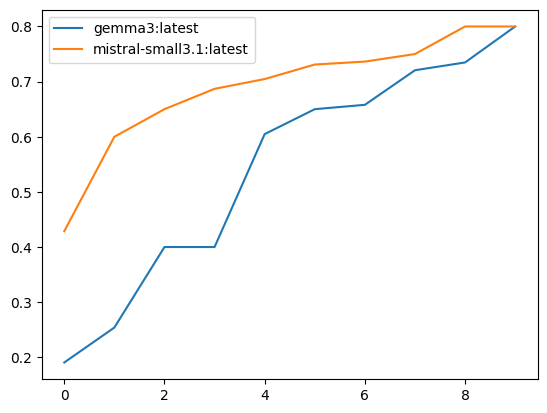

In [11]:
import matplotlib.pylab as plt
errors = []
for model in models:
    df = dfs[model]
    errors.append((model, df.error.median()))
    plt.plot(sorted(df['error'].values.tolist()), label=model)
plt.legend();

In [7]:
dfe = pd.DataFrame(errors, columns = ['model', 'medianError'])

In [8]:
dfe.sort_values(by='medianError')

,model,medianError
0,gemma3:latest,0.627415
1,mistral-small3.1:latest,0.717814


In [ ]:
plt.plot(